# 📊 Netflix Data Visualization Task

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load dataset
df= pd.read_csv(r"C:\Users\ZBooK\OneDrive\Desktop\Netflix Project\netflix1.csv")

## Initial Exploration (EDA)

 ### Task 1: Basic Inspection

In [7]:
# Display the first 5 rows.
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [8]:
# Check dataset shape
df.shape

(8790, 10)

In [9]:
# Check dataset info
df.info

<bound method DataFrame.info of      show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   

In [10]:
# Check data types.
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [11]:
# Numeric vs Categorical Columns



### **Questions to Answer:**

- How many rows and columns are there?
    
- Which columns are numeric?
    
- Which columns are categorical?
    

Rows: 8790, Columns: 10

Numeric: release_year

Categorical: show_id
type
title
director
country
date_added
rating
duration
listed_in

### Task 2: Missing Values Check

In [12]:
# Check if there are missing values.
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

#### Explain why missing values matter before visualization.

Because they affect the statistics of the data, and they also can bias the results, leading to inaccurate visualization

## Feature Understanding & Cleaning

### Task 3: Date Handling


In [13]:
# Convert `date_added` to datetime.
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract `year_added` from it.
df['year_added'] = df['date_added'].dt.year


**Question:**

- Why is datetime conversion important for visualization?
    


To allow time-based analysis

### Task 4: Duration Cleaning


- Create a new column `duration_minutes` for Movies only.
    
- Ignore TV Shows in this step.
    

**Hint:** Split the `duration` column.


In [14]:
df['duration_minutes'] = df['duration'].where(df['type'] == 'Movie').str.split(' ').str[0].astype(float)

## Visualization Tasks (Matplotlib)


### Task 5: Content Type Distribution

**Plot:** Bar Chart

- Show the count of Movies vs TV Shows.
    
- Use Matplotlib only.

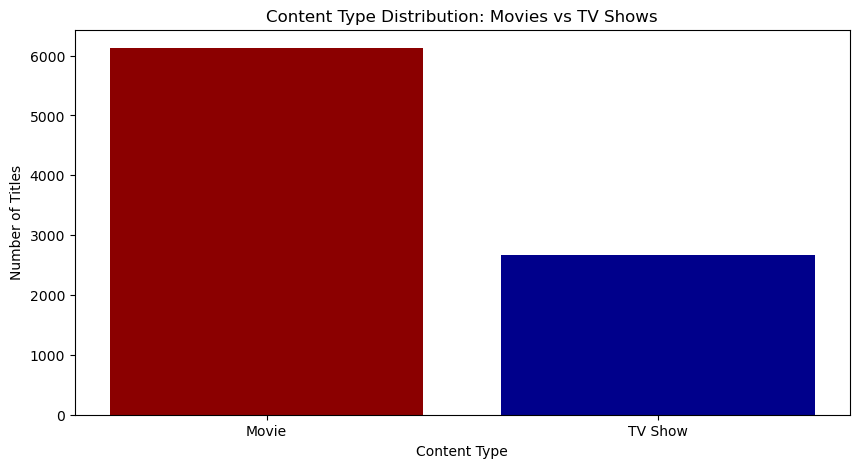

In [15]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(type_counts.index, type_counts.values, color=['darkred', 'darkblue'])
plt.title('Content Type Distribution: Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()


**Insight to Write:**

- Which content type dominates Netflix?

Movies

### Task 6: Titles Released Per Year

**Plot:** Line Plot

- Count number of titles per `release_year`.
    
- Plot the trend.

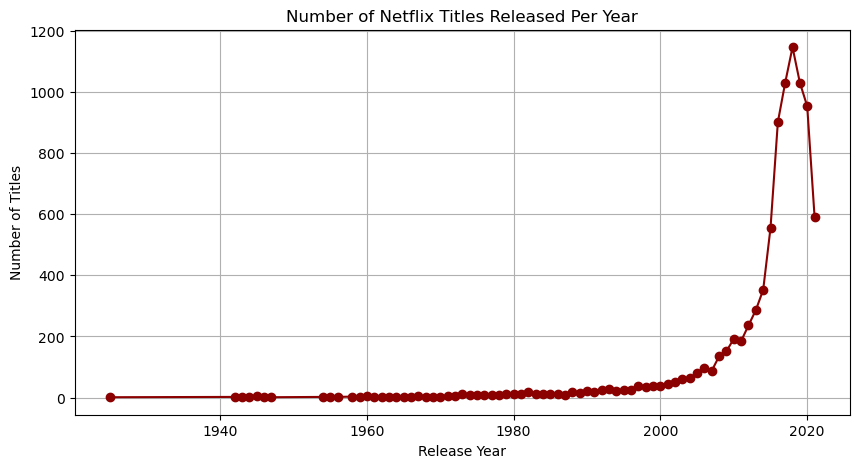

In [16]:
titles_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(titles_per_year.index, titles_per_year.values, marker='o', linestyle='-', color='darkred')
plt.title('Number of Netflix Titles Released Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid()
plt.show()

**Insight:**

- Is Netflix content increasing over time?

Yes

### Task 7: Movie Duration Distribution

**Plot:** Histogram

- Plot distribution of `duration_minutes`.
    
- Choose an appropriate number of bins.
    


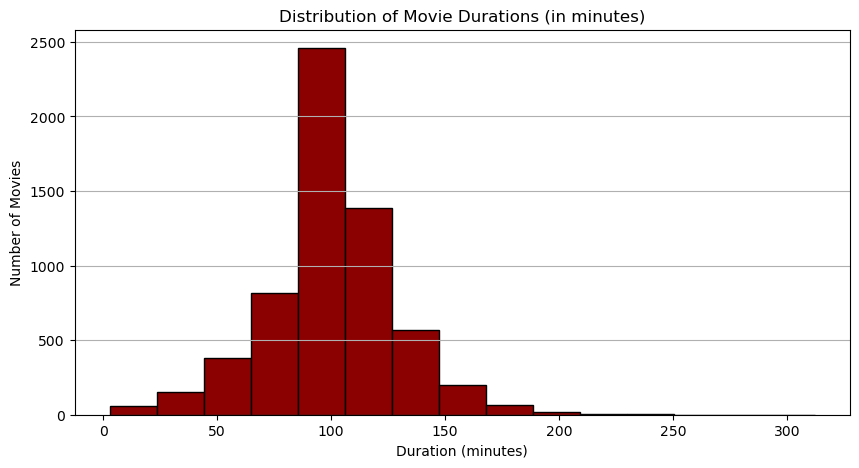

In [14]:
plt.figure(figsize=(10,5))
plt.hist(df['duration_minutes'].dropna(), bins=15, color='darkred', edgecolor='black')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.show()

**Insight:**

- Are most movies short or long?

Mostly short

## Part 4: Visualization Tasks (Seaborn)

### Task 8: Rating Distribution

**Plot:** Countplot

- Show distribution of ratings.

C:\Users\ZBooK\AppData\Local\Temp\ipykernel_7884\3044762123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')


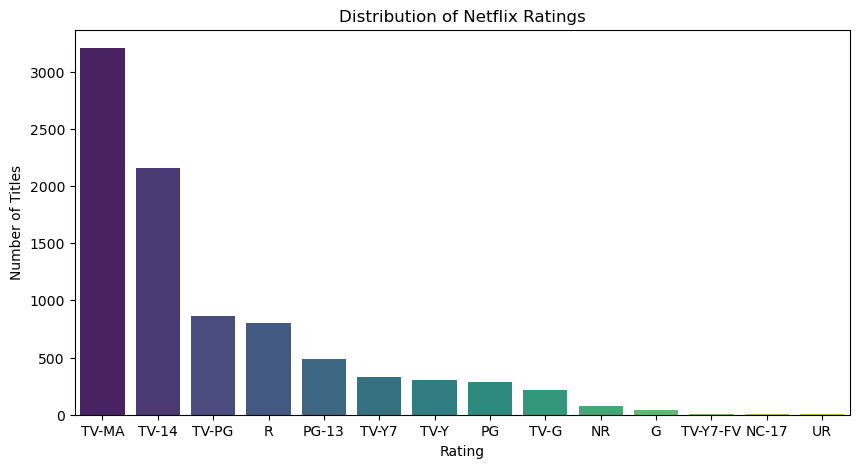

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Netflix Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()

**Insight:**

- Which rating appears most frequently?

TV-MA

### Task 9: Top 10 Countries by Content

**Plot:** Barplot

- Find top 10 countries with most titles.
    
- Plot using Seaborn.
    

C:\Users\ZBooK\AppData\Local\Temp\ipykernel_7884\444621905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


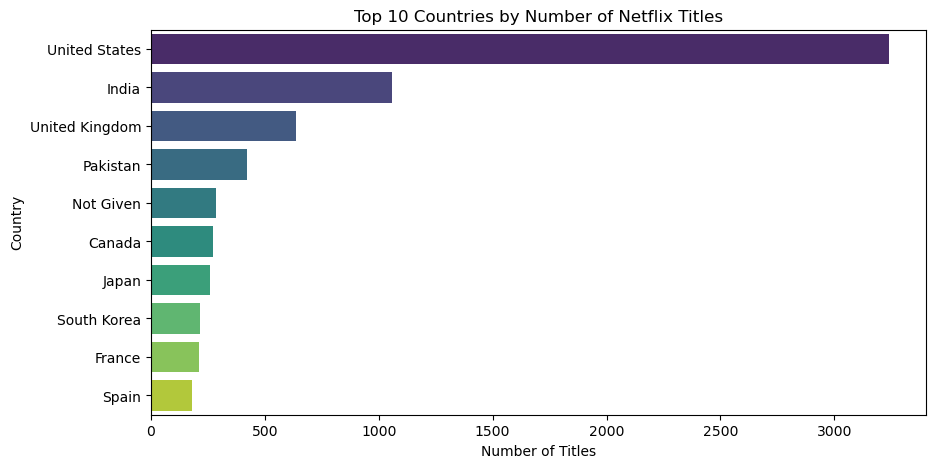

In [7]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Insight:**

- Which countries contribute most to Netflix content?
    

US

### Task 10: Release Year vs Type

**Plot:** Boxplot

- Compare release years for Movies vs TV Shows.
    


C:\Users\ZBooK\AppData\Local\Temp\ipykernel_7884\3289581524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='release_year', palette='viridis')


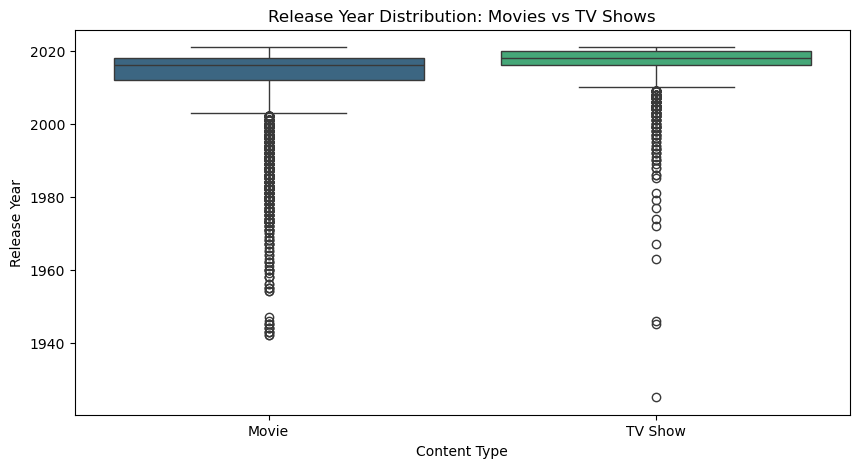

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='type', y='release_year', palette='viridis')
plt.title('Release Year Distribution: Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Release Year')
plt.show()

**Insight:**

- Which type tends to have newer content?
    


In [ ]:
TV-shows

## Part 5: Advanced Visuals

### Task 11: Facet by Content Type

**Plot:** FacetGrid

- Plot distribution of release_year split by `type`.
    


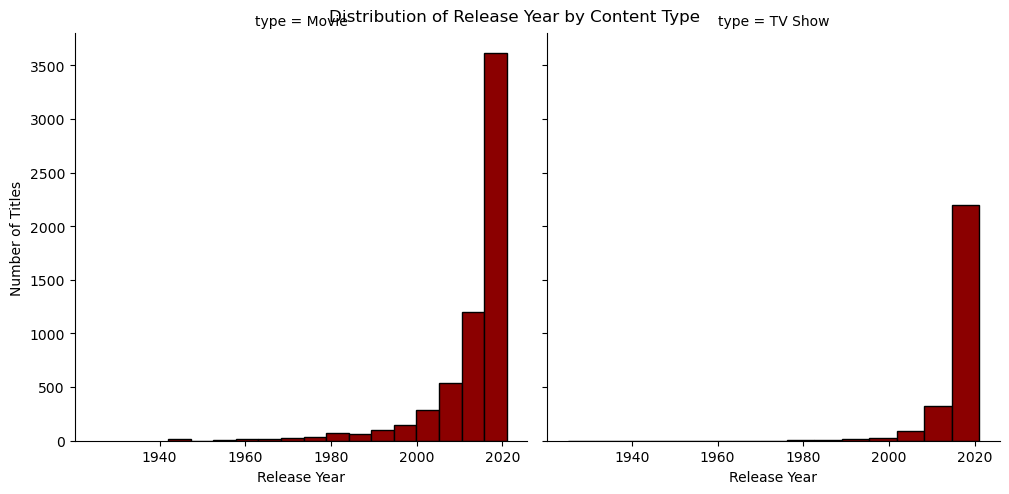

In [3]:
a = sns.FacetGrid(df, col='type', height=5, aspect=1)
a.map(plt.hist, 'release_year', bins=15, color='darkred', edgecolor='black')
a.set_axis_labels('Release Year', 'Number of Titles')
a.fig.suptitle('Distribution of Release Year by Content Type')
plt.show()

### Task 12: Correlation Heatmap

**Plot:** Heatmap

- Create correlation matrix for numeric columns.
    


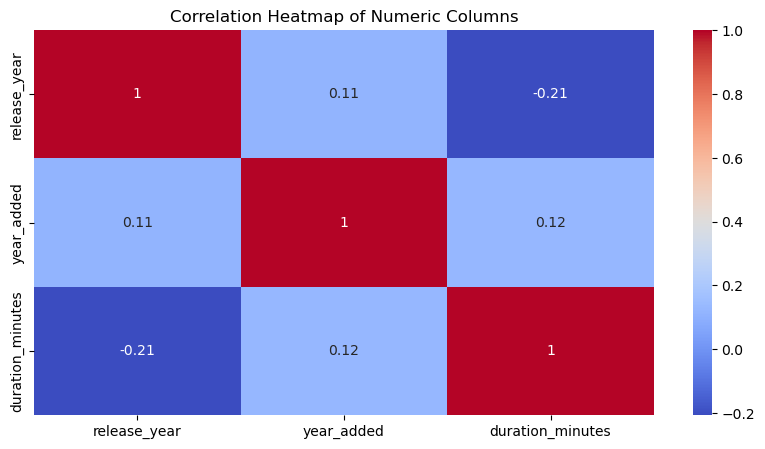

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

**Question:**

- Why does correlation look limited in this dataset?
    

## Part 6: Critical Thinking Section

Answer in words:

1. Which visualization was most useful and why?
    
2. Which plot could be misleading if misused?
    
3. How would wrong color choices affect interpretation?
    


1- Line, as it shows trends over time, and easy to compare
2- I think heatmap
3- It will be hard to interpret the graphs

## Bonus Challenge (Optional)

Choose ONE:

- Visualize top 5 genres.
    
- Analyze content added per year (using `year_added`).
    
- Compare movie duration across top 3 countries.
    

#### Bonus Challenge: Visualize top 5 genres.

C:\Users\ZBooK\AppData\Local\Temp\ipykernel_7884\998359392.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


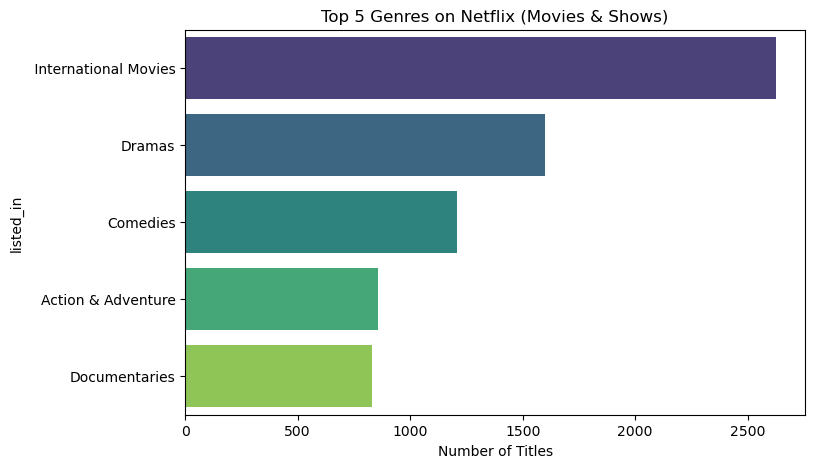

In [4]:
# Remove rows where the listed_in column is missing
df_genre = df.dropna(subset=['listed_in'])

# Split multiple genres (e.g., "Comedies, Dramas") and flatten
all_genres = df_genre['listed_in'].str.split(',').explode()

# Count the top 5 genres
top_genres = all_genres.value_counts().head(5)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 5 Genres on Netflix (Movies & Shows)')
plt.xlabel('Number of Titles')
plt.show()

#### Bonus Challenge: Compare movie duration across top 3 countries.

C:\Users\ZBooK\AppData\Local\Temp\ipykernel_7884\3329253576.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min','').astype(float)
C:\Users\ZBooK\AppData\Local\Temp\ipykernel_7884\3329253576.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='duration', palette='viridis', data=top_movies)


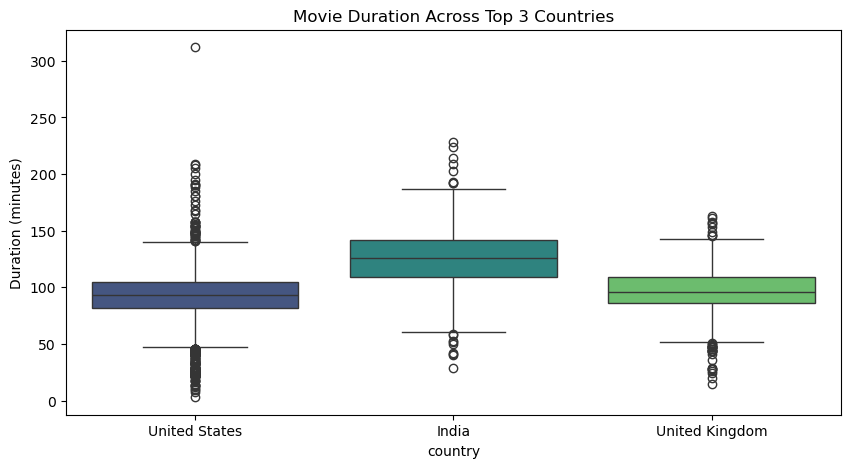

In [5]:
# Only keep movies
movies = df[df['type'] == 'Movie']

# Make sure duration is numeric
# If it's like "90 min", remove 'min' and convert
movies['duration'] = movies['duration'].str.replace(' min','').astype(float)

# Top 3 countries with most movies
top_countries = movies['country'].value_counts().head(3).index

# Filter movies from these countries
top_movies = movies[movies['country'].isin(top_countries)]

# Plot duration
plt.figure(figsize=(10,5))
sns.boxplot(x='country', y='duration', palette='viridis', data=top_movies)
plt.title('Movie Duration Across Top 3 Countries')
plt.ylabel('Duration (minutes)')
plt.show()


## Submission Requirements

- Notebook must run without errors.
    
- Each plot must include:
    
    - Title
        
    - Axis labels
        
- Each plot must have **1–2 lines of insight**.
    

### Final Note

This task focuses on **thinking like a Data Analyst**, not just drawing charts.  
The goal is to answer questions visually and clearly.